In [8]:
from torchvision import datasets
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from letter_recognition import RNG

%matplotlib inline

In [9]:
# Dataset import
train = datasets.EMNIST("./letter_recognition/data/", train=True, split="letters", download=False)
test = datasets.EMNIST("./letter_recognition/data/", train=False, split="letters", download=False)
data = train + test

In [10]:
# X/Y split
images = np.empty((len(data), 1, 28, 28))
labels = np.empty(len(data))
for i in tqdm(range(len(data))):
    images[i, 0] = data[i][0]
    labels[i] = data[i][1] - 1 # -1 because we index from 0 (A: 0, B: 1, etc...)

unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

  0%|          | 0/145600 [00:00<?, ?it/s]

{0.0: 5600,
 1.0: 5600,
 2.0: 5600,
 3.0: 5600,
 4.0: 5600,
 5.0: 5600,
 6.0: 5600,
 7.0: 5600,
 8.0: 5600,
 9.0: 5600,
 10.0: 5600,
 11.0: 5600,
 12.0: 5600,
 13.0: 5600,
 14.0: 5600,
 15.0: 5600,
 16.0: 5600,
 17.0: 5600,
 18.0: 5600,
 19.0: 5600,
 20.0: 5600,
 21.0: 5600,
 22.0: 5600,
 23.0: 5600,
 24.0: 5600,
 25.0: 5600}

In [11]:
# Rotate, flip and binarize
images_rotated = scipy.ndimage.rotate(images, -90, axes=(2, 3))
images_flipped = np.flip(images_rotated, 3)
images_normalized = (images_flipped - np.min(images_flipped)) / (np.max(images_flipped) - np.min(images_flipped))

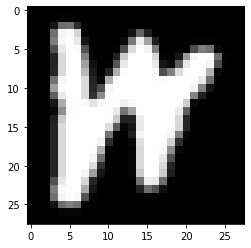

In [12]:
fig, ax = plt.subplots()
ax.imshow(images_normalized[0, 0], cmap="gray")
plt.show()

In [13]:
# Shuffle just in case
p = RNG.permutation(len(images_normalized))
images_normalized = images_normalized[p]
labels = labels[p]

In [14]:
# Numpy saving for future uses
with open("letter_recognition/data/numpy/data.npy", "wb") as f:
    np.save(f, images_normalized)
with open("letter_recognition/data/numpy/labels.npy", "wb") as f:
    np.save(f, labels)